In [114]:
import sklearn
import numpy as np
import numpy.random as rnd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def plot_generated_data(X, y):
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.show()
    
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])


def plot_logistic(_new, y_proba):
    decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

    plt.figure(figsize=(8, 3))
    plt.plot(X[y==0], y[y==0], "bs")
    plt.plot(X[y==1], y[y==1], "g^")
    plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
    plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
    plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
    plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
    plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
    plt.xlabel("Petal width (cm)", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.axis([0, 3, -0.02, 1.02])
    plt.show()



Lab1

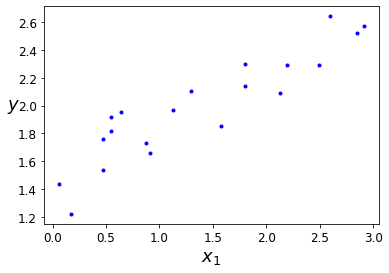

In [115]:
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X + np.random.rand(m,1) / 1.5
X_new = np.linspace(0,3, 100).reshape(100, 1)

plot_generated_data(X,y)

In [116]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
print('Ridge Predict valude: ', ridge_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
print('SGD Predict value: ', sgd_reg.predict([[1.5]]))

Ridge Predict valude:  [[2.03470631]]
SGD Predict value:  [1.94311106]


No handles with labels found to put in legend.


(0.0, 3.0, 0.0, 4.0)

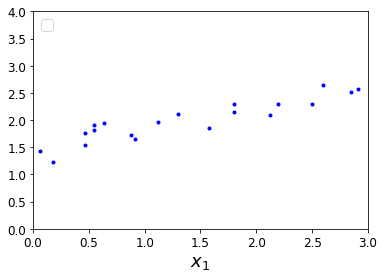

In [117]:
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0,3,0,4])

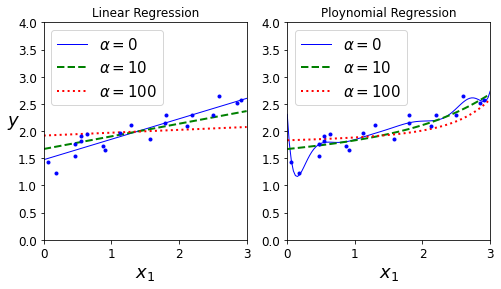

In [118]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.title("Linear Regression")
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10, 100), random_state=42)
plt.title("Ploynomial Regression")
plt.show()

Lab2

In [119]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
print('Lasso Predict value:', lasso_reg.predict([[1.5]]))

Lasso Predict value: [2.02180523]


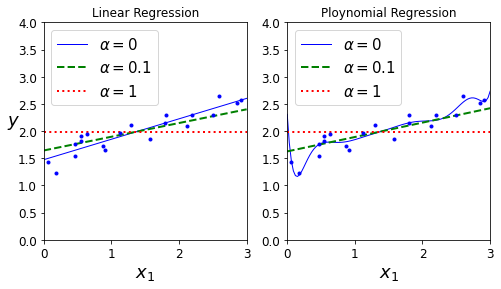

In [120]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.title("Linear Regression")
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 0.1, 1), random_state=42)
plt.title("Ploynomial Regression")
plt.show()

Lab 3

In [121]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

print('Dataset keys:', iris.keys())

print('Data sample 0:', iris["data"][0])

print('Target:', iris["target"][0])

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Data sample 0: [5.1 3.5 1.4 0.2]
Target: 0


In [122]:
X = iris["data"][:, 3]
y = (iris["target"] == 2).astype(int)

In [123]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X.reshape(-1,1),y)

LogisticRegression()

In [124]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


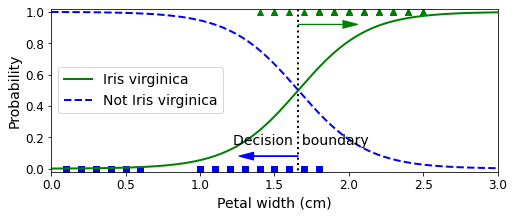

In [125]:
plot_logistic(X_new, y_proba)

# 연습문제

## Question 1
Build a Logistic regression model to reconize Iris-Versicolor with following requirements
* Use 2 features >> sepal width, petal length
* Randomly split Iris data into training - test sets with ratio 8:2 using train_test_split with random_state = 10.
* Report the accuracies of model on training and test set.

**< Tip >**

model.score(data,target) 을 사용해 정확도를 구하시오.

정답 : 학습 정확도는 0.7167이고 Test 정확도는 0.7333입니다.

### 1. 데이터 로드
### 1.1) Iris 데이터 로드

In [126]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

### 1.2) x와 y값 설정.

In [127]:
X = iris["data"][:, 1:3]
y = (iris["target"] == 1).astype(int)

### 1.3) Train과 Test 데이터 구별
* train_test_split(feature, target, test_size, random_state)를 사용해서 학습과 테스트 데이터셋을 구별합니다.

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### 2. 모델 빌드
### 2.1) LogisticRegression모델 빌드

In [130]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

### 2.2) LogisticRegression 훈련

In [131]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [132]:
log_reg.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

### 3. 성능 평가
### 3.1) 학습 데이터로 스코어 평가(정확도)
* 학습 정확도는 0.7167이다.

In [133]:
print("학습정확도:", log_reg.score(X_train, y_train))

학습정확도: 0.7166666666666667


### 3.2) 테스트 데이터로 스코어 평가(정확도)
* Test 정확도는 0.7333이다.

In [134]:
print("test정확도:", log_reg.score(X_test, y_test))

test정확도: 0.7333333333333333


## Question 2
Build a Logistic regression model to reconize Iris-Versicolor with following requirements
* Use all 4 features 
* Randomly split Iris data into training - test sets with ratio 8:2 using train_test_split with random_state = 10.
* Report the accuracies of model on training and test set.

**< Tip >**

model.score(data,target) 을 사용해 정확도를 구하시오.

정답 : 학습 정확도는 0.7083이고 Test 정확도는 0.7667입니다.

In [135]:
X = iris["data"]
y = (iris["target"] == 1).astype(int)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [138]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [139]:
print("학습정확도:", log_reg.score(X_train, y_train))
print("test정확도:", log_reg.score(X_test, y_test))

학습정확도: 0.7083333333333334
test정확도: 0.7666666666666667


### Question 3

In [141]:
import sklearn
import numpy as np
import os
# Import for week 3
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [142]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [163]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [164]:
y = y.astype(np.uint8)

In [165]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [166]:
X_train = X_train / 255
X_test = X_test / 255

In [167]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42, tol=0.001)

In [175]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, tol=0.001)

In [185]:
predictions = log_reg.predict(X)
predictions

array([3, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [186]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy")

array([0.91555, 0.91755, 0.91965])

In [187]:
print("mnist학습정확도:", log_reg.score(X_train, y_train))
print("mnist의 test정확도:", log_reg.score(X_test, y_test))

mnist학습정확도: 0.9393166666666667
mnist의 test정확도: 0.9256
